In [7]:
import pandas as pd
import numpy as np
from make_df import create_df, make_inputs
from naive import naive_fit, get_true_labels
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
import matplotlib


In this notebook we test our custom 'Hard EM' algorithm against the following simpler alternatives for populating the missing cure labels:



(I) Creating one cluster from the noncensord individuals and two clusters from the cesnored individuals, then assigning cure
labels to the censored individuals by comparing which of the two censored clusters is closer to the noncensored one, giving it the label '1' (not cured), and the furhter one the label '0'.

(II) Guessing that a censored individual is cured with a probability of 50%.

(III) Guessing that anyone who is censored is also cured.

This is achieved by creating test data sets in which we know exactly who is cured and who is censored, then removing the cure labels for the censored individuals, and feeding the censored and noncensored inputs into our algorithm. The latter is achieved
using the 'naive_fit' function with the 'use_HardEM' option.

In [8]:
#To avoid a dataset with only one label we append the following extra columns.

extra0 = pd.DataFrame([[0.1,0.1,0.1,0,1,0]],columns = ['x1', 'x2', 'x3', 'cure_label', 'int', 'censoring_indicator'])

extra1 = pd.DataFrame([[0.1,0.1,0.1,1,1,1]],columns = ['x1', 'x2', 'x3', 'cure_label', 'int', 'censoring_indicator'])

In [9]:
extra0 

,x1,x2,x3,cure_label,int,censoring_indicator
0,0.1,0.1,0.1,0,1,0


In [10]:
extra1

,x1,x2,x3,cure_label,int,censoring_indicator
0,0.1,0.1,0.1,1,1,1


In [11]:
extra = pd.concat([extra0, extra1])

In [45]:
#This is (I)
r_weights = np.random.uniform(-0.9,0.9,(10,4)) 
#The above will be used for the model parameter weights which we use to compute
#the cure lables for our test sets via sigmoid function.

probs = np.random.uniform(0.1,0.9,10) #probability of being censored given one is not cured

scores = []
covariates = ['x1', 'x2', 'x3'] #We choose three covariates for illustration.
dist = [[0, 1], [0, 1], [0, 1]] #Drawing covariates from a normal distribution with mean 0 and std 1.
cols = ['censoring_indicator', 'cure_label']

for test_model_weights in r_weights:
    
    for p in probs:
    
        foo = create_df(covariates, dist, 150, test_model_weights, 0.5) 
        #We have 150 rows in our table and p is the probability
        #of being censored given one is not cured we use to 
        #assign who is censored and who isn't.
    
        foo = pd.concat([foo, extra])
    
        censored_inputs = make_inputs(foo, 0, cols)

        noncensored_inputs = make_inputs(foo, 1, cols)
    
        fit = naive_fit(censored_inputs, noncensored_inputs, 'use_HardEM')    
    
        y_pred = fit['pred']
    
        y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
        y_scores = fit['prob']
    
        hard_acc = accuracy_score(y_true, y_pred) 
        #In above 'hard' is the score our algorithm produces. In this case, accuracy.
    
        hard_auc = roc_auc_score(y_true, y_scores)
        
        hard_logloss = log_loss(y_true, y_scores)
    
        fit_naive = naive_fit(censored_inputs, noncensored_inputs, 'use_clustering') 
        #See the opening description.
    
        y_pred_naive = fit_naive['pred']
    
    
        y_scores_naive = fit_naive['prob']
    
        naive_acc = accuracy_score(y_true, y_pred_naive) 
        #Above is accuracy of the result produced by naive way of populating
        #the missing lables.
        naive_auc = roc_auc_score(y_true, y_scores_naive)
        
        naive_logloss = log_loss(y_true, y_scores_naive)
        
        scores.append([hard_auc, naive_auc, hard_acc, naive_acc, hard_logloss, naive_logloss])
    
    
new_df = pd.DataFrame(columns=['Hard_auc', 'Naive_auc', 'Hard_acc', 'Naive_acc', 'Hard_ll', 'Naive_ll'], data=scores)

In [46]:
len(new_df)

100

In [47]:
len(new_df[new_df['Hard_ll']-new_df['Naive_ll']<0].index)
#How many times our logloss score was lower (better).

78

In [48]:
len(new_df[new_df['Hard_auc']-new_df['Naive_auc']>0].index)
#How many times our AUC score was higher.

86

In [49]:
len(new_df[new_df['Hard_acc']-new_df['Naive_acc']>0].index) 
#How many times our accuracy was higher.

68

In [12]:
#This is (II)

r_weights = np.random.uniform(-0.9,0.9,(24,4)) 
#The above will be used for the model parameter weights which we use to compute
#the cure lables for our test sets via sigmoid function.

probs = np.random.uniform(0.1,0.9,25) #probability of being censored given one is not cured

scores = []
covariates = ['x1', 'x2', 'x3'] #We choose three covariates for illustration.
dist = [[0, 1], [0, 1], [0, 1]] #Drawing covariates from a normal distribution with mean 0 and std 1.
cols = ['censoring_indicator', 'cure_label']

for test_model_weights in r_weights:
    
    for p in probs:
    
        foo = create_df(covariates, dist, 150, test_model_weights, 0.5) 
        #We have 150 rows in our table and p is the probability
        #of being censored given one is not cured we use to 
        #assign who is censored and who isn't.
    
        foo = pd.concat([foo, extra])
    
        censored_inputs = make_inputs(foo, 0, cols)

        noncensored_inputs = make_inputs(foo, 1, cols)
    
        fit = naive_fit(censored_inputs, noncensored_inputs, 'use_HardEM')    
    
        y_pred = fit['pred']
    
        y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
        y_scores = fit['prob']
    
        hard_acc = accuracy_score(y_true, y_pred) 
        #In above 'hard' is the score our algorithm produces. In this case, accuracy.
    
        hard_auc = roc_auc_score(y_true, y_scores)
        
        hard_logloss = log_loss(y_true, y_scores)
    
        fit_naive = naive_fit(censored_inputs, noncensored_inputs, 'fifty_fifty') 
        #See the opening description.
    
        y_pred_naive = fit_naive['pred']
    
    
        y_scores_naive = fit_naive['prob']
    
        naive_acc = accuracy_score(y_true, y_pred_naive) 
        #Above is accuracy of the result produced by naive way of populating
        #the missing lables.
        naive_auc = roc_auc_score(y_true, y_scores_naive)
        
        naive_logloss = log_loss(y_true, y_scores_naive)
        
        scores.append([hard_auc, naive_auc, hard_acc, naive_acc, hard_logloss, naive_logloss])
    
    
new_df = pd.DataFrame(columns=['Hard_auc', 'Naive_auc', 'Hard_acc', 'Naive_acc', 'Hard_ll', 'Naive_ll'], data=scores)

In [13]:
len(new_df)

600

In [14]:
len(new_df[new_df['Hard_ll']-new_df['Naive_ll']<0].index)
#How many times our logloss score was lower (better).

432

In [15]:
len(new_df[new_df['Hard_auc']-new_df['Naive_auc']>0].index)
#How many times our AUC score was higher.

372

In [16]:
len(new_df[new_df['Hard_acc']-new_df['Naive_acc']>0].index) 
#How many times our accuracy was higher.



440

In [55]:
#This is (III)


r_weights = np.random.uniform(-0.9,0.9,(10,4)) 
#The above will be used for the model parameter weights which we use to compute
#the cure lables for our test sets via sigmoid function.

probs = np.random.uniform(0.1,0.9,10) #probability of being censored given one is not cured

scores = []
covariates = ['x1', 'x2', 'x3'] #We choose three covariates for illustration.
dist = [[0, 1], [0, 1], [0, 1]] #Drawing covariates from a normal distribution with mean 0 and std 1.
cols = ['censoring_indicator', 'cure_label']

for test_model_weights in r_weights:
    
    for p in probs:
    
        foo = create_df(covariates, dist, 150, test_model_weights, 0.5) 
        #We have 150 rows in our table and p is the probability
        #of being censored given one is not cured we use to 
        #assign who is censored and who isn't.
    
        foo = pd.concat([foo, extra])
    
        censored_inputs = make_inputs(foo, 0, cols)

        noncensored_inputs = make_inputs(foo, 1, cols)
    
        fit = naive_fit(censored_inputs, noncensored_inputs, 'use_HardEM')    
    
        y_pred = fit['pred']
    
        y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
        y_scores = fit['prob']
    
        hard_acc = accuracy_score(y_true, y_pred) 
        #In above 'hard' is the score our algorithm produces. In this case, accuracy.
    
        hard_auc = roc_auc_score(y_true, y_scores)
        
        hard_logloss = log_loss(y_true, y_scores)
    
        fit_naive = naive_fit(censored_inputs, noncensored_inputs, 'all_cens_cured') 
        #See the opening description.
    
        y_pred_naive = fit_naive['pred']
    
    
        y_scores_naive = fit_naive['prob']
    
        naive_acc = accuracy_score(y_true, y_pred_naive) 
        #Above is accuracy of the result produced by naive way of populating
        #the missing lables.
        naive_auc = roc_auc_score(y_true, y_scores_naive)
        
        naive_logloss = log_loss(y_true, y_scores_naive)
        
        scores.append([hard_auc, naive_auc, hard_acc, naive_acc, hard_logloss, naive_logloss])
    
    
new_df = pd.DataFrame(columns=['Hard_auc', 'Naive_auc', 'Hard_acc', 'Naive_acc', 'Hard_ll', 'Naive_ll'], data=scores)

In [56]:
len(new_df)

100

In [57]:
len(new_df[new_df['Hard_ll']-new_df['Naive_ll']<0].index)
#How many times our logloss score was lower (better).

78

In [58]:
len(new_df[new_df['Hard_auc']-new_df['Naive_auc']>0].index)
#How many times our AUC score was higher.

23

In [59]:
len(new_df[new_df['Hard_acc']-new_df['Naive_acc']>0].index) 
#How many times our accuracy was higher.


84

Below is some exploratory analysis which shows that that the naive model separates the data better, despite
having a poorer logloss.

In [51]:
test_model_weights = np.random.uniform(-0.5,0.5,4)
scores = []
covariates = ['x1', 'x2', 'x3']
dist = [[0, 1], [0, 1], [0, 1]]
cols = ['censoring_indicator', 'cure_label']

scores=[]
foo = create_df(covariates, dist, 150, test_model_weights, 0.01)
    
foo = pd.concat([foo, extra])
    
censored_inputs = make_inputs(foo, 0, cols)

noncensored_inputs = make_inputs(foo, 1, cols)
    
fit = naive_fit(censored_inputs, noncensored_inputs, 'use_HardEM')    
    
y_pred = fit['pred']
    
y_true = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
y_scores = fit['prob']
    
hard_acc = accuracy_score(y_true, y_pred)
    
hard_auc = roc_auc_score(y_true, y_scores)
    
fit_naive = naive_fit(censored_inputs, noncensored_inputs, 'all_cens_cured')
    
y_pred_naive = fit_naive['pred']
    
y_true_naive = get_true_labels(foo, ['censoring_indicator', 'cure_label'])
    
y_scores_naive = fit_naive['prob']
    
naive_acc = accuracy_score(y_true_naive, y_pred_naive)
    
naive_auc = roc_auc_score(y_true_naive, y_scores_naive)
    

scores.append([hard_auc, naive_auc, hard_acc, naive_acc ])
    
new_df = pd.DataFrame(columns=['HardEM_auc', 'NaiveEM_auc', 'HardEM_acc', 'NaiveEM_acc'], data=scores)

In [52]:
new_df.head()

,HardEM_auc,NaiveEM_auc,HardEM_acc,NaiveEM_acc
0,0.995521,0.995712,0.973684,0.986842


In [53]:
separated_df_hard = pd.DataFrame({'pred_prob':y_scores, 'pred_cure_label':y_pred, 'true_cure_label':y_true})

In [54]:
separated_df_hard.head()

,pred_prob,pred_cure_label,true_cure_label
0,0.462964,-0.0,0.0
1,0.501953,1.0,0.0
2,0.044128,-0.0,0.0
3,0.462407,-0.0,0.0
4,0.128298,-0.0,0.0


In [55]:
separated_df_naive = pd.DataFrame({'pred_prob':y_scores_naive, 'pred_cure_label':y_pred_naive, 'true_cure_label':y_true_naive})

In [56]:
cured_hard = separated_df_hard[separated_df_hard.true_cure_label==0]

not_cured_hard = separated_df_hard[separated_df_hard.true_cure_label==1]

In [57]:
cured_naive = separated_df_naive[separated_df_naive.true_cure_label==0]

not_cured_naive = separated_df_naive[separated_df_naive.true_cure_label==1]

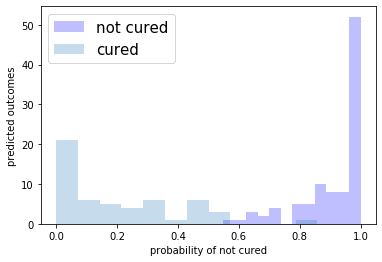

In [58]:
#We plot the predicted cured (not cured) labels on y-axis and the probability of not being cured on the x-axis.
#No surprise here

#Note that we expect a lot of variance with this model even when run multiple times on the same training data, which can 
#seen by how the distribution below changes with different runs.

#The figures indicate the naive model separates the data better. 

import matplotlib.pyplot as plt
plt.xlabel('probability of not cured')
plt.ylabel('predicted outcomes')

plt.hist(not_cured_hard['pred_prob'], bins=12, label='not cured', color='blue', alpha=0.25)
plt.hist(cured_hard['pred_prob'], bins=12, label='cured', alpha=0.25)
plt.legend(fontsize=15)

plt.show()

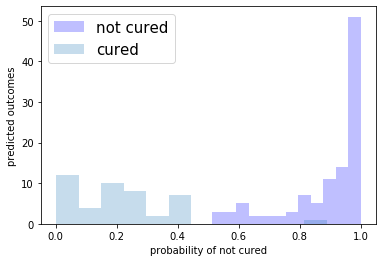

In [50]:
plt.xlabel('probability of not cured')
plt.ylabel('predicted outcomes')

plt.hist(not_cured_naive['pred_prob'], bins=12, label='not cured', color='blue', alpha=0.25)
plt.hist(cured_naive['pred_prob'], bins=12, label='cured', alpha=0.25)
plt.legend(fontsize=15)

plt.show()